# 1. INTRODUCCIÓN
En este Notebook trataremos dos ejercicios como modo de afianzar los conceptos sobre árboles decisión y modelos de ensamble de árboles de decisión.


*   EJERCICIO PRECIO COCHES
*   EJERCICIO PRECIO CASAS



## 1.1 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import ensemble

## 1.2 Carga el dataset del precio de coches
Aquí teneis el url del archivo raw del dataset sobre el precio de diversos coches de segunda mano.

https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/coches_usados_esp.csv

Importa los datos en un dataframe llamado **dataframe df_coches**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/coches_usados_esp.csv'

# Importa csv
df_coches = pd.read_csv(url, sep=';')

# Visualización primeras filas
df_coches.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


## 1.3 Carga el dataset del precio de casas
Aquí teneis el url del archivo raw del dataset sobre el precio de diversas venta de casas en el condado de King County en USA.

https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/casas_train.csv

Importa los datos en un dataframe llamado **dataframe df_casas**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/casas_train.csv'

# Importa csv
df_casas = pd.read_csv(url, sep=',')

# Visualización primeras filas
df_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


# 2. EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables.

## 2.1 EDA COCHES

In [ ]:
df_coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93991 entries, 0 to 93990
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          93991 non-null  int64  
 1   make        93991 non-null  object 
 2   model       93991 non-null  object 
 3   version     93991 non-null  object 
 4   months_old  93717 non-null  float64
 5   power       93504 non-null  float64
 6   sale_type   93979 non-null  object 
 7   num_owners  22660 non-null  float64
 8   gear_type   92710 non-null  object 
 9   fuel_type   93926 non-null  object 
 10  kms         93127 non-null  float64
 11  price       93991 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 8.6+ MB


In [ ]:
df_coches.describe()

,ID,months_old,power,num_owners,kms,price
count,93991.00000,93717.000000,93504.000000,22660.000000,93127.000000,93991.000000
mean,55100.87935,63.094775,99.729477,1.055119,82702.565250,16587.291379
std,33119.32602,56.837686,42.698809,0.277124,75186.697789,15563.712383
min,25.00000,1.000000,0.000000,1.000000,0.000000,200.000000
25%,25452.50000,16.000000,77.000000,1.000000,18300.000000,8500.000000
50%,53896.00000,46.000000,88.000000,1.000000,66000.000000,13490.000000
75%,83573.50000,96.000000,110.000000,1.000000,129000.000000,19999.000000
max,113143.00000,374.000000,809.000000,11.000000,497000.000000,999999.000000


<ipython-input-6-85ac2578a4ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df_coches.corr(),2),


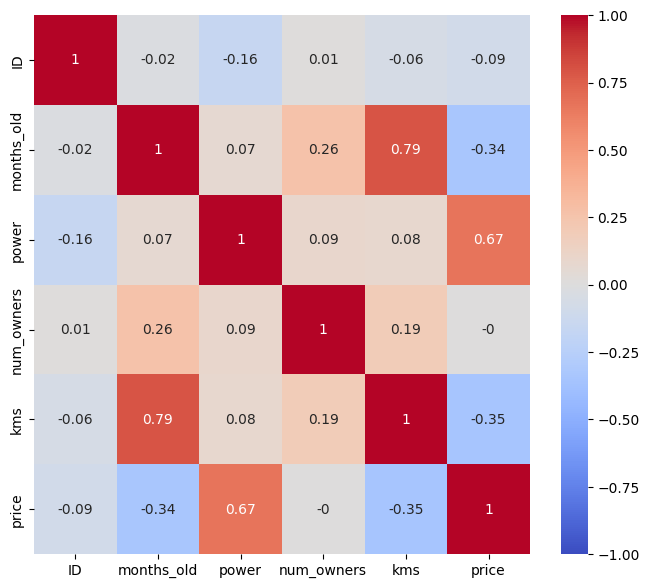

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_coches.corr(),2),
            vmin=-1, vmax=1,
            annot=True, cmap="coolwarm")
plt.show()

## 2.2 EDA CASAS
[Aquí](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885) más información sobre qué significa cada variable.

In [ ]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  float64
 3   bedrooms       14633 non-null  int64  
 4   bathrooms      14633 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  int64  
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  int64  
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [ ]:
df_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.463300e+04,1.463300e+04,14633.000000,14633.000000,14633.000000,1.463300e+04,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000
mean,4.560180e+09,5.391814e+05,3.377161,2.128904,2098.319073,1.495053e+04,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883,98077.895852,47.562848,-122.213923,1996.840498,12770.057473
std,2.873192e+09,3.691627e+05,0.942636,0.771628,929.621019,3.752184e+04,0.540567,0.087923,0.767346,0.664473,1.178388,835.193434,448.463475,29.489005,416.334428,53.407146,0.137514,0.141430,691.376543,26107.338627
min,1.000102e+06,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.115200e+09,3.200000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.477600,-122.328000,1490.000000,5099.000000
50%,3.902100e+09,4.500000e+05,3.000000,2.250000,1930.000000,7.634000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,98065.000000,47.576400,-122.231000,1850.000000,7620.000000
75%,7.298900e+09,6.450000e+05,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,98117.000000,47.678900,-122.125000,2380.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000


<ipython-input-9-d4d911f25791>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df_casas.corr(),2),


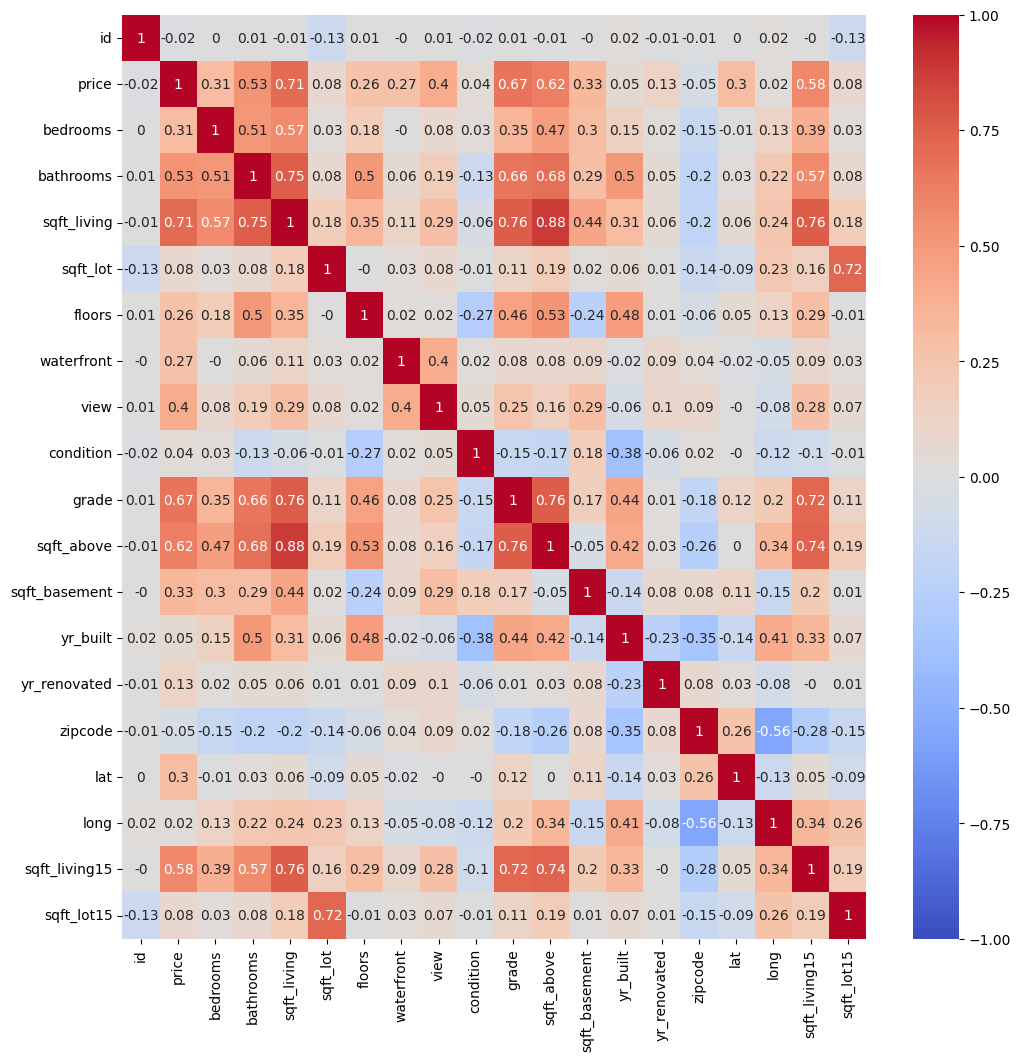

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,12))
sns.heatmap(np.round(df_casas.corr(),2),
            vmin=-1, vmax=1,
            annot=True, cmap="coolwarm")
plt.show()

# 3. Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar.

Necesitamos limpiarlo antes de poder entrenar los modelos.

## 3.1 DATASET COCHES: Preparación de los datos

### 3.1.1 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [ ]:
df_coches.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


In [ ]:
df_coches.columns

Index(['ID', 'make', 'model', 'version', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price'],
      dtype='object')

In [ ]:
cols = ['make', 'model', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price']

cat_cols = ['make', 'model', 'sale_type', 'gear_type', 'fuel_type']

In [ ]:
df_coches = df_coches[cols]
df_coches.head()

,make,model,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,Porsche,911,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,Ford,Mustang,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,Porsche,911,358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,Porsche,911,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,Porsche,911,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


### 3.1.2 Dumificación de variables categóricas
Recuerda que debemos transformar las variables categóricas para convertirlas en numéricas.

In [ ]:
df_coches = pd.get_dummies(df_coches[cols],
                           prefix_sep='_',
                           drop_first=True,
                           columns=cat_cols)

display(len(df_coches))
df_coches.head()

93991

,months_old,power,num_owners,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,...,sale_type_new,sale_type_used,gear_type_manual,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid
0,240.0,210.0,3.0,202000.0,999999,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,54.0,487.0,1.0,30000.0,685000,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,358.0,220.0,NaN,56300.0,555555,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,14.0,368.0,1.0,2800.0,470000,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,3.0,515.0,NaN,10.0,450000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### 3.1.3 Limpieza de nulos
Con la dumificación hemos eliminado los nulos en las columnas categóricas sin deshacernos de las filas. Queda algún nulo en las variables numéricas?

Recuerda que puedes mirarlo con dataframe.isna().sum() y si sí hay nulos, puedes rellenarlos con el método .fillna().

In [ ]:
# Rellenamos los nulos de las variables numéricas
df_coches[['months_old', 'power', 'num_owners', 'kms', 'price']].isna().sum()

months_old      274
power           487
num_owners    71331
kms             864
price             0
dtype: int64

In [ ]:
# Hay muchos nulos en num_owners
# Quizás esto tiene que ver con origenes del coche desconocidos?
# Vamos a limpiar la variable en 1, 2, 3+, nulo y la utilizamos como categórica
filtro_muchos_owners = df_coches['num_owners']>=3
df_coches.loc[filtro_muchos_owners, 'num_owners'] = '3+'
df_coches = pd.get_dummies(df_coches, prefix_sep='_',
                   dummy_na=True,
                   drop_first=True,
                   columns=['num_owners'])
df_coches.head()

,months_old,power,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,make_Citroen,...,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid,num_owners_2.0,num_owners_3+,num_owners_nan
0,240.0,210.0,202000.0,999999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,54.0,487.0,30000.0,685000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,358.0,220.0,56300.0,555555,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,14.0,368.0,2800.0,470000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.0,515.0,10.0,450000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_coches[['months_old', 'power', 'kms', 'price']].isna().sum()

months_old    274
power         487
kms           864
price           0
dtype: int64

In [ ]:
for col in ['months_old', 'power', 'kms']:
  df_coches[col] = df_coches[col].fillna(df_coches[col].median())

In [ ]:
df_coches.isna().sum()

months_old            0
power                 0
kms                   0
price                 0
make_Audi             0
                     ..
fuel_type_gasoline    0
fuel_type_hybrid      0
num_owners_2.0        0
num_owners_3+         0
num_owners_nan        0
Length: 301, dtype: int64

### 3.1.4 Train - test

In [ ]:
# Primero generamos la matriz X con las variables predictoras
# y el vector y con la variable a predecir
X_CO = df_coches.drop('price',axis=1)
y_CO = df_coches['price']

# Comprueba sus tamaños
X_CO.shape, y_CO.shape

((93991, 300), (93991,))

In [ ]:
# Haz la partición train-test
X_CO_train, X_CO_test, y_CO_train, y_CO_test = train_test_split(X_CO,
                                                                y_CO,
                                                                test_size=0.33,
                                                                random_state=42)

# Comprueba sus tamaños
X_CO_train.shape, X_CO_test.shape, y_CO_train.shape, y_CO_test.shape

((62973, 300), (31018, 300), (62973,), (31018,))

## 3.2 DATASET CASAS: Preparación de los datos

### 3.2.1 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [ ]:
df_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [ ]:
df_casas.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15',
        'price']


In [ ]:
df_casas = df_casas[cols]
df_casas.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
3,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1225000.0
4,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500.0


### 3.2.2 Train - test

In [ ]:
# Primero generamos la matriz X con las variables predictoras
# y el vector y con la variable a predecir
X_CA = df_casas.drop('price',axis=1)
y_CA = df_casas['price']

# Comprueba sus tamaños
X_CA.shape, y_CA.shape

((14633, 18), (14633,))

In [ ]:
# Haz la partición train-test
X_CA_train, X_CA_test, y_CA_train, y_CA_test = train_test_split(X_CA,
                                                                y_CA,
                                                                test_size=0.33,
                                                                random_state=42)

# Comprueba sus tamaños
X_CA_train.shape, X_CA_test.shape, y_CA_train.shape, y_CA_test.shape

((9804, 18), (4829, 18), (9804,), (4829,))

# 4. Árbol de Decisión
Documentación sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

In [ ]:
# Inicializo el modelo
modelo_1 = tree.DecisionTreeRegressor(max_depth=3)
modelo_1

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Entreno el árbol con el set de entrenamiento
modelo_1 = modelo_1.fit(X=X_CO_train, y=y_CO_train)

In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(modelo_1,
                       feature_names=list(X_CO_train.columns)))

|--- power <= 182.00
|   |--- power <= 109.50
|   |   |--- months_old <= 69.50
|   |   |   |--- value: [14554.74]
|   |   |--- months_old >  69.50
|   |   |   |--- value: [6695.08]
|   |--- power >  109.50
|   |   |--- months_old <= 50.50
|   |   |   |--- value: [29430.63]
|   |   |--- months_old >  50.50
|   |   |   |--- value: [14607.95]
|--- power >  182.00
|   |--- power <= 308.50
|   |   |--- kms <= 87476.50
|   |   |   |--- value: [59507.88]
|   |   |--- kms >  87476.50
|   |   |   |--- value: [30496.17]
|   |--- power >  308.50
|   |   |--- months_old <= 54.50
|   |   |   |--- value: [151158.72]
|   |   |--- months_old >  54.50
|   |   |   |--- value: [60199.54]



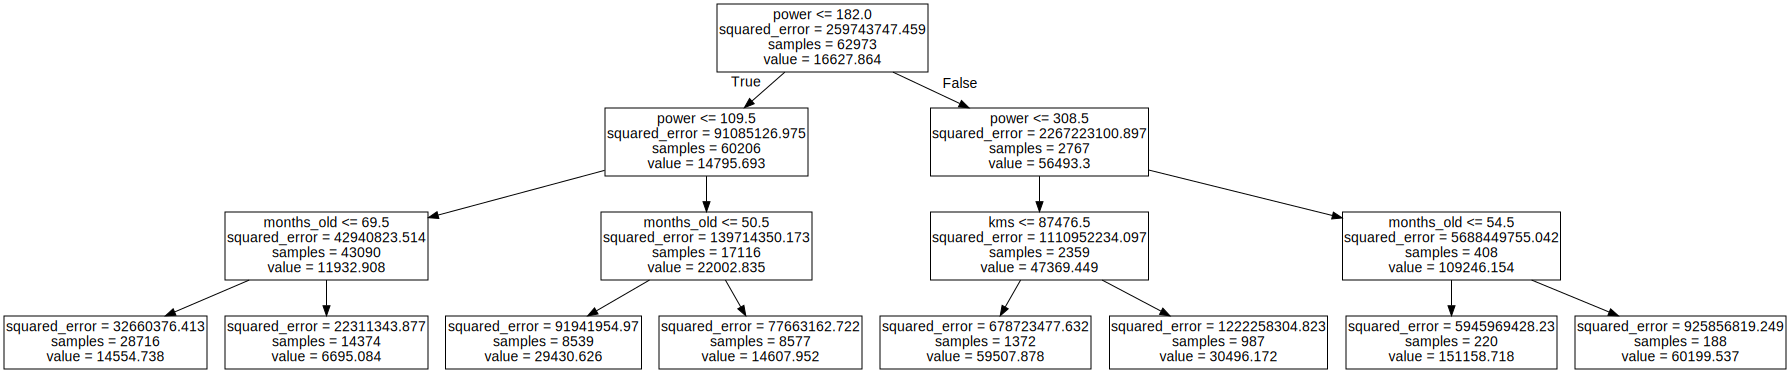

In [ ]:
# Export_graphviz
dot_data = tree.export_graphviz(modelo_1,
                                out_file=None,
                                feature_names=list(X_CO_train.columns))
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Evaluamos el rendimiento del modelo
y_CO_pred_train = modelo_1.predict(X_CO_train)
# Calidad predicción train
rmse_train = round(mean_squared_error(y_CO_train, y_CO_pred_train, squared=False), 2)
print('RMSE en set de entrenamiento :', rmse_train)

# Uso el árbol para predecir sobre el dataset de test
y_CO_pred_test = modelo_1.predict(X_CO_test)
# Calidad predicción test
rmse_test = round(mean_squared_error(y_CO_test, y_CO_pred_test, squared=False), 2)
print('RMSE en set de test :', rmse_test)

# Degradación de la predicción
print('Degradación: ' + str(round((rmse_test-rmse_train)/rmse_train*100,2)) + '%')

RMSE en set de entrenamiento : 10025.57
RMSE en set de test : 8564.43
Degradación: -14.57%


## 4.1 Función

In [ ]:
def entrenar_modelo_y_predecir(modelo, X_train, X_test, y_train, y_test):
  """
  Función que entrena un modelo ya inicializado y evalua su calidad en el set
  de entrenamiento y de test, indicando la degradación en este.
  """
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Calidad predicción train
  rmse_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 2)
  print('RMSE en set de entrenamiento :', rmse_train)
  # Calidad predicción test
  rmse_test = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)
  print('RMSE en set de test :', rmse_test)
  # Degradación de la predicción
  print('Degradación: ' + str(round((rmse_test-rmse_train)/rmse_train*100,2)) + '%')

## 4.2 COCHES

In [ ]:
# Define el árbol
modelo_arbol_coches = tree.DecisionTreeRegressor(
    max_depth=55)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 346.38
RMSE en set de test : 5772.57
Degradación: 1566.54%


In [ ]:
# Define el árbol
modelo_arbol_coches = tree.DecisionTreeRegressor(
    max_depth=50,
    min_samples_split = 10)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 4409.26
RMSE en set de test : 5381.17
Degradación: 22.04%


In [ ]:
# Define el árbol
modelo_arbol_coches = tree.DecisionTreeRegressor(
    max_depth=60,
    min_samples_split = 15)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 4591.47
RMSE en set de test : 5304.22
Degradación: 15.52%


## 4.3 CASAS

In [ ]:
# Define el árbol
modelo_arbol_casas = tree.DecisionTreeRegressor(
    max_depth=50)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 3660.51
RMSE en set de test : 203762.69
Degradación: 5466.51%


In [ ]:
# Define el árbol
modelo_arbol = tree.DecisionTreeRegressor(
    max_depth=40,
    min_samples_split = 10,
    min_impurity_decrease = 0.01)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 65499.55
RMSE en set de test : 185117.98
Degradación: 182.62%


In [ ]:
# Define el árbol
modelo_arbol = tree.DecisionTreeRegressor(
    max_depth=12,
    min_samples_split = 50,
    min_samples_leaf = 10,
    min_impurity_decrease = 50)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 142936.56
RMSE en set de test : 176729.03
Degradación: 23.64%


# 5. Random Forest
Documentación sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## 5.1 COCHES

In [ ]:
# Define el modelo de Random Forest
modelo_RF_coches = ensemble.RandomForestRegressor(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2603.2
RMSE en set de test : 4894.2
Degradación: 88.01%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_coches = ensemble.RandomForestRegressor(
    n_estimators = 100,
    max_features = "auto",
    min_samples_split = 10)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE en set de entrenamiento : 4687.28
RMSE en set de test : 4806.37
Degradación: 2.54%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_coches = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_features = "auto",
    max_depth = 15,
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE en set de entrenamiento : 5769.9
RMSE en set de test : 5045.78
Degradación: -12.55%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_coches = ensemble.RandomForestRegressor(
    n_estimators = 150,
    max_features = "auto",
    max_depth = 20,
    min_samples_split = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE en set de entrenamiento : 4297.83
RMSE en set de test : 4910.61
Degradación: 14.26%


## 5.2 CASAS

In [ ]:
# Define el modelo de Random Forest
modelo_RF_casas = ensemble.RandomForestRegressor(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 48076.91
RMSE en set de test : 134446.47
Degradación: 179.65%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_casas = ensemble.RandomForestRegressor(
    n_estimators = 200)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 49883.12
RMSE en set de test : 131996.34
Degradación: 164.61%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_casas = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_features = "auto",
    max_depth = 12,
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE en set de entrenamiento : 101963.53
RMSE en set de test : 139228.58
Degradación: 36.55%


# 6. Gradient Boosting
Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html.

## 6.1 COCHES

In [ ]:
modelo_GB_coches = ensemble.GradientBoostingRegressor(
    n_estimators = 100,
    learning_rate = 0.1)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 5354.16
RMSE en set de test : 5386.99
Degradación: 0.61%


In [ ]:
modelo_GB_coches = ensemble.GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate = 0.01,
    max_depth = 8,
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 5969.58
RMSE en set de test : 5562.82
Degradación: -6.81%


In [ ]:
modelo_GB_coches = ensemble.GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate = 0.01,
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 5681.75
RMSE en set de test : 5347.03
Degradación: -5.89%


## 6.2 CASAS

In [ ]:
modelo_GB_casas = ensemble.GradientBoostingRegressor(
    n_estimators = 100,
    learning_rate = 0.1)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 109816.3
RMSE en set de test : 129213.07
Degradación: 17.66%


In [ ]:
modelo_GB_casas = ensemble.GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate = 0.01)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 174050.54
RMSE en set de test : 182234.78
Degradación: 4.7%


In [ ]:
modelo_GB_casas = ensemble.GradientBoostingRegressor(
    n_estimators = 250,
    learning_rate = 0.015)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 138046.08
RMSE en set de test : 149595.58
Degradación: 8.37%


In [ ]:
modelo_GB_casas = ensemble.GradientBoostingRegressor(
    n_estimators = 250,
    learning_rate = 0.01,
    max_depth = 10)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 57939.48
RMSE en set de test : 149305.31
Degradación: 157.69%


In [ ]:
modelo_GB_casas = ensemble.GradientBoostingRegressor(
    n_estimators = 250,
    learning_rate = 0.015,
    max_depth = 10,
    min_samples_split = 15)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 46685.96
RMSE en set de test : 144788.05
Degradación: 210.13%


# 7. ADABoost
Parámetros: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

## 7.1 COCHES

In [ ]:
modelo_ADA_coches = ensemble.AdaBoostRegressor()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 34381.19
RMSE en set de test : 34422.74
Degradación: 0.12%


In [ ]:
modelo_ADA_coches = ensemble.AdaBoostRegressor(
    n_estimators = 1000
)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 10240.5
RMSE en set de test : 10285.54
Degradación: 0.44%


In [ ]:
modelo_ADA_coches = ensemble.AdaBoostRegressor(
    n_estimators = 10000
)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 10653.24
RMSE en set de test : 10825.59
Degradación: 1.62%


## 7.2 CASAS

In [ ]:
modelo_ADA_casas = ensemble.AdaBoostRegressor()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 274029.38
RMSE en set de test : 288237.74
Degradación: 5.18%


In [ ]:
modelo_ADA_casas = ensemble.AdaBoostRegressor(
    n_estimators = 1000
)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 326886.43
RMSE en set de test : 340715.36
Degradación: 4.23%


In [ ]:
modelo_ADA_casas = ensemble.AdaBoostRegressor(
    n_estimators = 10000
)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 366521.14
RMSE en set de test : 376925.64
Degradación: 2.84%


# 8. XGBoost
Definición de los parámetros: https://xgboost.readthedocs.io/en/latest/parameter.html.

In [ ]:
from xgboost import XGBRegressor

## 8.1 COCHES

In [ ]:
modelo_XGB_coches = XGBRegressor()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 3504.15
RMSE en set de test : 4854.43
Degradación: 38.53%


In [ ]:
modelo_XGB_coches = XGBRegressor(
    max_depth=10)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2212.45
RMSE en set de test : 4857.52
Degradación: 119.55%


In [ ]:
modelo_XGB_coches = XGBRegressor(
    max_depth=10,
    reg_lambda=5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2658.56
RMSE en set de test : 4725.18
Degradación: 77.73%


In [ ]:
modelo_XGB_coches = XGBRegressor(
    max_depth=10,
    reg_lambda=7)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_coches,
                           X_CO_train, X_CO_test, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2741.93
RMSE en set de test : 4912.37
Degradación: 79.16%


## 8.2 CASAS

In [ ]:
# Menos overfitting y menos rendimiento
modelo_XGB_casas = XGBRegressor(
    max_depth=3,
    learning_rate=0.1)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 111954.05
RMSE en set de test : 130358.19
Degradación: 16.44%


In [ ]:
# Más overfitting y más rendimiento
modelo_XGB_casas = XGBRegressor(
    n_estimators=125,
    max_depth=4,
    learning_rate=0.075)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_casas,
                           X_CA_train, X_CA_test, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 97973.88
RMSE en set de test : 124292.65
Degradación: 26.86%


# 9. Stacking
Hay maneras de automatizar la creación de modelos con stacking. Por ahora no vamos a centrarnos en eso sino en la lógica detrás del stacking, por lo que realizaremos modelos de stacking a mano paso a paso.

- 1 Entrenar varios modelos de manera independiente (es lo que hemos venido haciendo en secciones anteriores)
- 2 Realizar predicciones con los distintos modelos
- 3 Entrenar un nuevo modelo que use las predicciones de los anteriores como variables

## 9.1 COCHES

### 9.1.1 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'arbol': modelo_arbol_coches,
    'Random Forest': modelo_RF_coches,
    'Gradient Boosting': modelo_GB_coches,
    'ADABoost': modelo_ADA_coches,
    'XGBoost': modelo_XGB_coches
}

X_STACKING_train_coches = pd.DataFrame()
X_STACKING_test_coches = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_coches[modelo] = diccionario_modelos[modelo].predict(X_CO_train)
  X_STACKING_test_coches[modelo] = diccionario_modelos[modelo].predict(X_CO_test)

X_STACKING_train_coches.head()

NameError: name 'modelo_arbol_coches' is not defined

### 9.1.2 Entrenamiento y predicción de metamodelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
metamodelo_coches = LinearRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_coches,
                           X_STACKING_train_coches, X_STACKING_test_coches, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2435.56
RMSE en set de test : 4870.12
Degradación: 99.96%


In [ ]:
metamodelo_coches = tree.DecisionTreeRegressor(
    max_depth=5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_coches,
                           X_STACKING_train_coches, X_STACKING_test_coches, y_CO_train, y_CO_test)

RMSE en set de entrenamiento : 2497.38
RMSE en set de test : 5282.97
Degradación: 111.54%


## 9.2 CASAS

### 9.2.1 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'arbol': modelo_arbol_casas,
    'Random Forest': modelo_RF_casas,
    'Gradient Boosting': modelo_GB_casas,
    'ADABoost': modelo_ADA_casas,
    'XGBoost': modelo_XGB_casas
}

X_STACKING_train_casas = pd.DataFrame()
X_STACKING_test_casas = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_casas[modelo] = diccionario_modelos[modelo].predict(X_CA_train)
  X_STACKING_test_casas[modelo] = diccionario_modelos[modelo].predict(X_CA_test)

X_STACKING_train_casas.head()

arbol
Random Forest
Gradient Boosting
ADABoost
XGBoost


,arbol,Random Forest,Gradient Boosting,ADABoost,XGBoost
0,456000.0,470303.398522,466663.899575,782072.605809,501441.37500
1,289000.0,328831.354155,332634.911953,764784.053122,358090.15625
2,550000.0,583466.480507,581840.296090,802447.681910,584003.87500
3,560000.0,585710.574712,548167.138291,802447.681910,606161.50000
4,538888.0,564961.192499,552072.026807,859887.512899,593218.12500


### 9.2.2 Entrenamiento y predicción de metamodelo

In [ ]:
metamodelo_casas = LinearRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_casas,
                           X_STACKING_train_casas, X_STACKING_test_casas, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 3660.51
RMSE en set de test : 203762.69
Degradación: 5466.51%


In [ ]:
metamodelo_casas = tree.DecisionTreeRegressor(
    max_depth=5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_casas,
                           X_STACKING_train_casas, X_STACKING_test_casas, y_CA_train, y_CA_test)

RMSE en set de entrenamiento : 20500.3
RMSE en set de test : 184913.2
Degradación: 802.0%
